## Script to download all the monthly PV production data and then unzip and merge the DFs.

In [2]:
import requests
from pathlib import Path

base_url = "https://nemweb.com.au/Data_Archive/Wholesale_Electricity/MMSDM/"

years = range(2017, 2023)  
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

file_prefix = "PUBLIC_DVD_ROOFTOP_PV_ACTUAL_"
file_suffix = ".zip"

download_dir = Path("../data/PV_Data/raw_data")  # The specified path
download_dir.mkdir(parents=True, exist_ok=True)

def download_file(url, path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_name} to {path}")
    else:
        print(f"Failed to download {file_name}: HTTP Status Code {response.status_code}")

for year in years:
    for month in months:
        file_name = f"{file_prefix}{year}{month}010000{file_suffix}"
        full_url = f"{base_url}{year}/MMSDM_{year}_{month}/MMSDM_Historical_Data_SQLLoader/DATA/{file_name}"
        file_path = download_dir / file_name
        
        print(f"Downloading {file_name}...")
        download_file(full_url, file_path)

print("Downloads complete.")



Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201701010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201701010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201702010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201702010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201703010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201703010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201704010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201704010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201705010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201705010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201706010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201706010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201707010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201707010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201708010000.zip to ../data/PV_Data/raw_dat

Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202008010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202008010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202009010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202009010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202010010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202010010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202011010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202011010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202012010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202012010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202101010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202101010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202102010000.zip to ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202102010000.zip
Downloaded PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202103010000.zip to ../data/PV_Data/raw_dat

## Script for Unzip

In [3]:
import zipfile
from pathlib import Path

# Specify the directory with the zip files
zip_files_dir = Path("../data/PV_Data/raw_data")
unzip_dir = zip_files_dir / "unzipped_data"

# Create a directory for the unzipped files if it doesn't exist
unzip_dir.mkdir(parents=True, exist_ok=True)

# Loop through each zip file in the directory and unzip it
for zip_file in zip_files_dir.glob("*.zip"):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        # Extract all the contents of zip file into the unzipped directory
        zip_ref.extractall(unzip_dir)
        print(f"Unzipped {zip_file} into {unzip_dir}")

print("Unzipping complete.")


Unzipped ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202003010000.zip into ../data/PV_Data/raw_data/unzipped_data
Unzipped ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201708010000.zip into ../data/PV_Data/raw_data/unzipped_data
Unzipped ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201804010000.zip into ../data/PV_Data/raw_data/unzipped_data
Unzipped ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201810010000.zip into ../data/PV_Data/raw_data/unzipped_data
Unzipped ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201711010000.zip into ../data/PV_Data/raw_data/unzipped_data
Unzipped ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201705010000.zip into ../data/PV_Data/raw_data/unzipped_data
Unzipped ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202107010000.zip into ../data/PV_Data/raw_data/unzipped_data
Unzipped ../data/PV_Data/raw_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201809010000.zip into ../data/PV_Data/raw_data/unzipped_data
Unzipped

## Lets load all the names of the unzipped files so we can compare their structure to make sure they have the same columns

In [4]:
from pathlib import Path

unzipped_files_dir = Path("../data/PV_Data/raw_data/unzipped_data")

file_paths = []

for file_path in unzipped_files_dir.rglob('*'):
    if file_path.is_file():
        file_paths.append(file_path)
        print(file_path)

print(f"Total files found: {len(file_paths)}")



../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202005010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202011010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202206010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201802010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202212010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201906010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202008010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201703010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201912010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202101010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201804010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTU

In [7]:
from pathlib import Path

unzipped_files_dir = Path("../data/PV_Data/raw_data/unzipped_data")

all_files = list(unzipped_files_dir.glob('*'))

for file in all_files:
    print(file)

csv_files = list(unzipped_files_dir.glob('*.csv'))
if csv_files:
    print("CSV files found:")
    for file in csv_files:
        print(file)
else:
    print("No CSV files found in the directory.")


../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202005010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202011010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202206010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201802010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202212010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201906010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202008010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201703010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201912010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_202101010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTUAL_201804010000.CSV
../data/PV_Data/raw_data/unzipped_data/PUBLIC_DVD_ROOFTOP_PV_ACTU

In [11]:
from pathlib import Path
import pandas as pd

unzipped_files_dir = Path("../data/PV_Data/raw_data/unzipped_data")

file_paths = []

for file_ext in ['*.CSV', '*.csv']:
    for file_path in unzipped_files_dir.glob(file_ext):
        if file_path.is_file():
            file_paths.append(file_path)

if not file_paths:
    print("No CSV files found in the directory.")
else:
    base_df = pd.read_csv(file_paths[0], header=1)  # Using header=1 to specify second row as header
    base_columns = base_df.columns.tolist()
    print(f"Base columns: {base_columns}")

    all_match = True

    
    for file_path in file_paths[1:]:  
        df = pd.read_csv(file_path, header=1)  # Using header=1 here as well
        if list(df.columns) != base_columns:
            all_match = False
            print(f"Columns in {file_path.name} do not match the base file structure.")

    if all_match:
        print("All files have the same column structure.")
    else:
        print("Some files have a different column structure.")




Base columns: ['I', 'ROOFTOP', 'ACTUAL', '2', 'INTERVAL_DATETIME', 'REGIONID', 'POWER', 'QI', 'TYPE', 'LASTCHANGED']
All files have the same column structure.


## All files have the same structure - Lets go ahead and merge

In [12]:
import pandas as pd
from pathlib import Path

unzipped_files_dir = Path("../data/PV_Data/raw_data/unzipped_data")

dataframes = []

for file_path in unzipped_files_dir.glob('*.CSV'):
    df = pd.read_csv(file_path, header=1)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_csv_path = unzipped_files_dir / "combined_data.csv"
combined_df.to_csv(combined_csv_path, index=False)

print(f"Combined CSV saved to {combined_csv_path}")


Combined CSV saved to ../data/PV_Data/raw_data/unzipped_data/combined_data.csv


In [14]:
import pandas as pd
from pathlib import Path

combined_csv_path = "../data/PV_Data/raw_data/unzipped_data/combined_data.csv"

combined_df = pd.read_csv(combined_csv_path)

df_info = combined_df.info()

df_description = combined_df.describe()

# Check for missing values
missing_values = combined_df.isnull().sum()

df_info, df_description, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973762 entries, 0 to 1973761
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   I                  object 
 1   ROOFTOP            object 
 2   ACTUAL             object 
 3   2                  float64
 4   INTERVAL_DATETIME  object 
 5   REGIONID           object 
 6   POWER              float64
 7   QI                 float64
 8   TYPE               object 
 9   LASTCHANGED        object 
dtypes: float64(3), object(7)
memory usage: 150.6+ MB


(None,
                2         POWER            QI
 count  1973690.0  1.973020e+06  1.973690e+06
 mean         2.0  2.014056e+02  8.218299e-01
 std          0.0  4.315817e+02  1.986320e-01
 min          2.0  0.000000e+00  0.000000e+00
 25%          2.0  0.000000e+00  6.000000e-01
 50%          2.0  1.070000e+00  1.000000e+00
 75%          2.0  1.533310e+02  1.000000e+00
 max          2.0  4.104816e+03  1.000000e+00,
 I                      0
 ROOFTOP                0
 ACTUAL                 0
 2                     72
 INTERVAL_DATETIME     72
 REGIONID              72
 POWER                742
 QI                    72
 TYPE                  72
 LASTCHANGED           72
 dtype: int64)

In [20]:
combined_df.head(100)

,I,ROOFTOP,ACTUAL,2,INTERVAL_DATETIME,REGIONID,POWER,QI,TYPE,LASTCHANGED
0,D,ROOFTOP,ACTUAL,2.0,2020/05/01 00:30:00,NSW1,0.0,1.0,MEASUREMENT,2020/05/01 00:50:42
1,D,ROOFTOP,ACTUAL,2.0,2020/05/01 00:30:00,NSW1,0.0,0.6,SATELLITE,2020/05/01 00:50:26
2,D,ROOFTOP,ACTUAL,2.0,2020/05/01 00:30:00,QLD1,0.0,1.0,MEASUREMENT,2020/05/01 00:50:42
3,D,ROOFTOP,ACTUAL,2.0,2020/05/01 00:30:00,QLD1,0.0,0.6,SATELLITE,2020/05/01 00:50:26
4,D,ROOFTOP,ACTUAL,2.0,2020/05/01 00:30:00,QLDC,0.0,1.0,MEASUREMENT,2020/05/01 00:50:42
...,...,...,...,...,...,...,...,...,...,...
95,D,ROOFTOP,ACTUAL,2.0,2020/05/01 02:30:00,TASN,0.0,0.6,SATELLITE,2020/05/01 02:50:27
96,D,ROOFTOP,ACTUAL,2.0,2020/05/01 02:30:00,TASS,0.0,1.0,MEASUREMENT,2020/05/01 02:50:42
97,D,ROOFTOP,ACTUAL,2.0,2020/05/01 02:30:00,TASS,0.0,0.6,SATELLITE,2020/05/01 02:50:27
98,D,ROOFTOP,ACTUAL,2.0,2020/05/01 02:30:00,VIC1,0.0,0.6,SATELLITE,2020/05/01 02:50:27


## Looks like theres a couple "Regions" for QLD etc - merge all the duplicates into one....

In [21]:
unique_regionids = combined_df['REGIONID'].unique()

print("Unique REGIONID values:")
print(unique_regionids)


Unique REGIONID values:
['NSW1' 'QLD1' 'QLDC' 'QLDN' 'QLDS' 'SA1' 'TAS1' 'TASN' 'TASS' 'VIC1' nan]


In [23]:
combined_df['INTERVAL_DATETIME'] = pd.to_datetime(combined_df['INTERVAL_DATETIME'])

print(combined_df['INTERVAL_DATETIME'].dtype)


datetime64[ns]


In [24]:
earliest_date = combined_df['INTERVAL_DATETIME'].min()

latest_date = combined_df['INTERVAL_DATETIME'].max()

print(f"The earliest datetime value is: {earliest_date}")
print(f"The latest datetime value is: {latest_date}")


The earliest datetime value is: 2017-01-01 00:30:00
The latest datetime value is: 2023-01-02 00:00:00


In [25]:
unique_regionids = combined_df['TYPE'].unique()

print("Unique Type values:")
print(unique_regionids)

Unique REGIONID values:
['MEASUREMENT' 'SATELLITE' nan 'DAILY']


## Filtering out satelite and daily measurements....

In [30]:
combined_df = combined_df[combined_df['TYPE'] == 'MEASUREMENT']


In [31]:
combined_df.info

<bound method DataFrame.info of          I  ROOFTOP  ACTUAL    2   INTERVAL_DATETIME REGIONID  POWER   QI  \
0        D  ROOFTOP  ACTUAL  2.0 2020-05-01 00:30:00     NSW1    0.0  1.0   
2        D  ROOFTOP  ACTUAL  2.0 2020-05-01 00:30:00     QLD1    0.0  1.0   
4        D  ROOFTOP  ACTUAL  2.0 2020-05-01 00:30:00     QLDC    0.0  1.0   
6        D  ROOFTOP  ACTUAL  2.0 2020-05-01 00:30:00     QLDN    0.0  1.0   
8        D  ROOFTOP  ACTUAL  2.0 2020-05-01 00:30:00     QLDS    0.0  1.0   
...     ..      ...     ...  ...                 ...      ...    ...  ...   
1973752  D  ROOFTOP  ACTUAL  2.0 2021-05-02 00:00:00      SA1    0.0  1.0   
1973754  D  ROOFTOP  ACTUAL  2.0 2021-05-02 00:00:00     TAS1    0.0  1.0   
1973755  D  ROOFTOP  ACTUAL  2.0 2021-05-02 00:00:00     TASN    0.0  1.0   
1973758  D  ROOFTOP  ACTUAL  2.0 2021-05-02 00:00:00     TASS    0.0  1.0   
1973760  D  ROOFTOP  ACTUAL  2.0 2021-05-02 00:00:00     VIC1    0.0  1.0   

                TYPE          LASTCHANGED  

In [32]:
combined_df

,I,ROOFTOP,ACTUAL,2,INTERVAL_DATETIME,REGIONID,POWER,QI,TYPE,LASTCHANGED
0,D,ROOFTOP,ACTUAL,2.0,2020-05-01 00:30:00,NSW1,0.0,1.0,MEASUREMENT,2020/05/01 00:50:42
2,D,ROOFTOP,ACTUAL,2.0,2020-05-01 00:30:00,QLD1,0.0,1.0,MEASUREMENT,2020/05/01 00:50:42
4,D,ROOFTOP,ACTUAL,2.0,2020-05-01 00:30:00,QLDC,0.0,1.0,MEASUREMENT,2020/05/01 00:50:42
6,D,ROOFTOP,ACTUAL,2.0,2020-05-01 00:30:00,QLDN,0.0,1.0,MEASUREMENT,2020/05/01 00:50:42
8,D,ROOFTOP,ACTUAL,2.0,2020-05-01 00:30:00,QLDS,0.0,1.0,MEASUREMENT,2020/05/01 00:50:42
...,...,...,...,...,...,...,...,...,...,...
1973752,D,ROOFTOP,ACTUAL,2.0,2021-05-02 00:00:00,SA1,0.0,1.0,MEASUREMENT,2021/05/02 00:19:42
1973754,D,ROOFTOP,ACTUAL,2.0,2021-05-02 00:00:00,TAS1,0.0,1.0,MEASUREMENT,2021/05/02 00:19:42
1973755,D,ROOFTOP,ACTUAL,2.0,2021-05-02 00:00:00,TASN,0.0,1.0,MEASUREMENT,2021/05/02 00:19:42
1973758,D,ROOFTOP,ACTUAL,2.0,2021-05-02 00:00:00,TASS,0.0,1.0,MEASUREMENT,2021/05/02 00:19:42


## Merging all state region ID's into one for QLD and one for TAS

In [35]:
region_to_state = {
    'NSW1': 'NSW',
    'QLD1': 'QLD', 'QLDC': 'QLD', 'QLDN': 'QLD', 'QLDS': 'QLD',
    'SA1': 'SA',
    'TAS1': 'TAS', 'TASN': 'TAS', 'TASS': 'TAS',
    'VIC1': 'VIC'
    
}

combined_df['State'] = combined_df['REGIONID'].replace(region_to_state)

combined_df_grouped = combined_df.groupby(['State', 'INTERVAL_DATETIME'])['POWER'].sum().reset_index()



In [38]:
combined_df_grouped.head(50)

,State,INTERVAL_DATETIME,POWER
0,NSW,2018-03-06 09:30:00,427.281
1,NSW,2018-03-06 10:00:00,495.195
2,NSW,2018-03-06 10:30:00,516.137
3,NSW,2018-03-06 11:00:00,549.542
4,NSW,2018-03-06 11:30:00,556.764
5,NSW,2018-03-06 12:00:00,605.312
6,NSW,2018-03-06 12:30:00,622.850
7,NSW,2018-03-06 13:00:00,623.553
8,NSW,2018-03-06 13:30:00,620.090
9,NSW,2018-03-06 14:00:00,571.619


In [39]:
unique_regionids = combined_df_grouped['State'].unique()

print("Unique Type values:")
print(unique_regionids)

Unique Type values:
['NSW' 'QLD' 'SA' 'TAS' 'VIC']


In [40]:
earliest_date = combined_df_grouped['INTERVAL_DATETIME'].min()

latest_date = combined_df_grouped['INTERVAL_DATETIME'].max()

print(f"The earliest datetime value is: {earliest_date}")
print(f"The latest datetime value is: {latest_date}")


The earliest datetime value is: 2018-03-06 09:30:00
The latest datetime value is: 2023-01-02 00:00:00


In [41]:
combined_df_grouped['INTERVAL_DATETIME'] = pd.to_datetime(combined_df_grouped['INTERVAL_DATETIME'])

combined_df_grouped_sorted = combined_df_grouped.sort_values('INTERVAL_DATETIME')



In [43]:
combined_df_grouped_sorted.head(20)

,State,INTERVAL_DATETIME,POWER
0,NSW,2018-03-06 09:30:00,427.281
84602,QLD,2018-03-06 09:30:00,730.922
338408,VIC,2018-03-06 09:30:00,520.076
253806,TAS,2018-03-06 09:30:00,122.102
169204,SA,2018-03-06 09:30:00,308.605
338409,VIC,2018-03-06 10:00:00,625.894
84603,QLD,2018-03-06 10:00:00,823.052
253807,TAS,2018-03-06 10:00:00,132.461
1,NSW,2018-03-06 10:00:00,495.195
169205,SA,2018-03-06 10:00:00,384.530


## Looks ok - Lets plot a few days to see if it makes sense

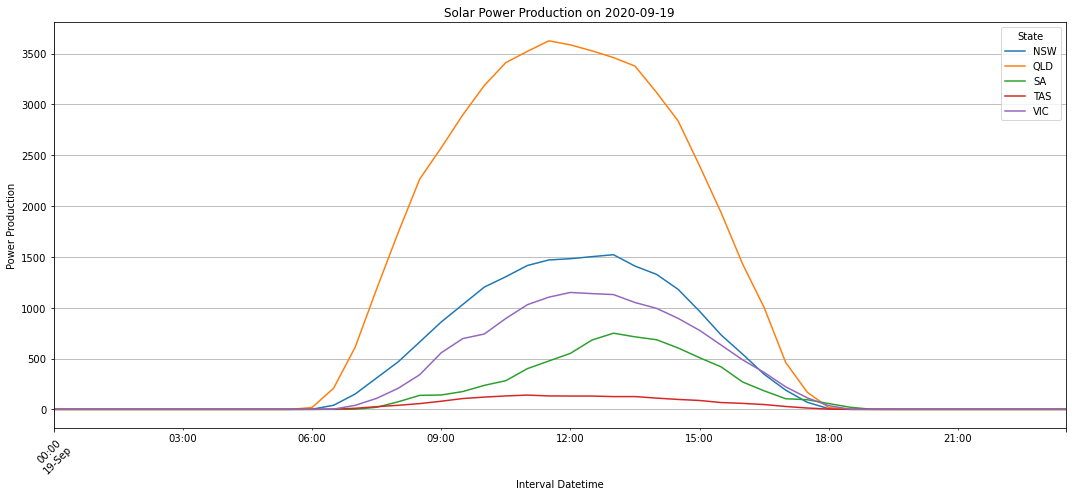

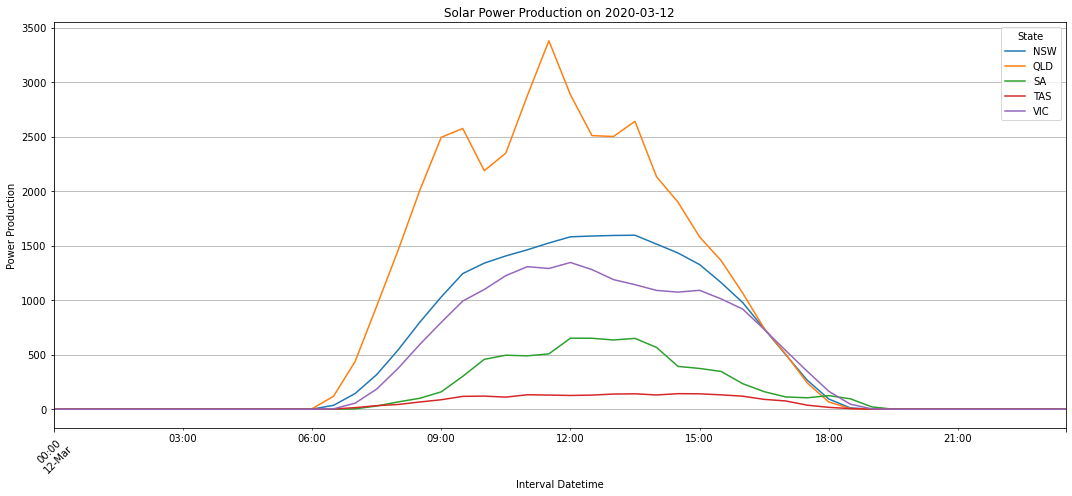

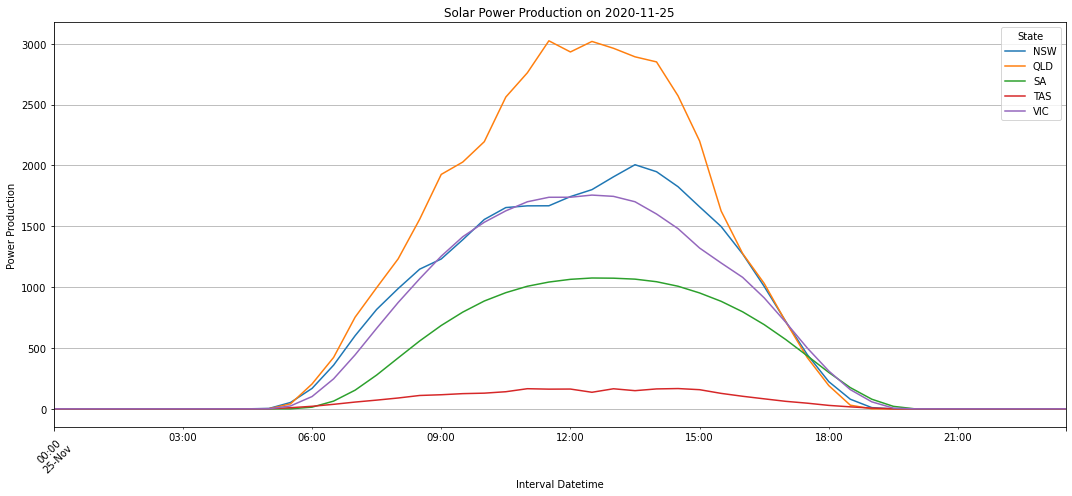

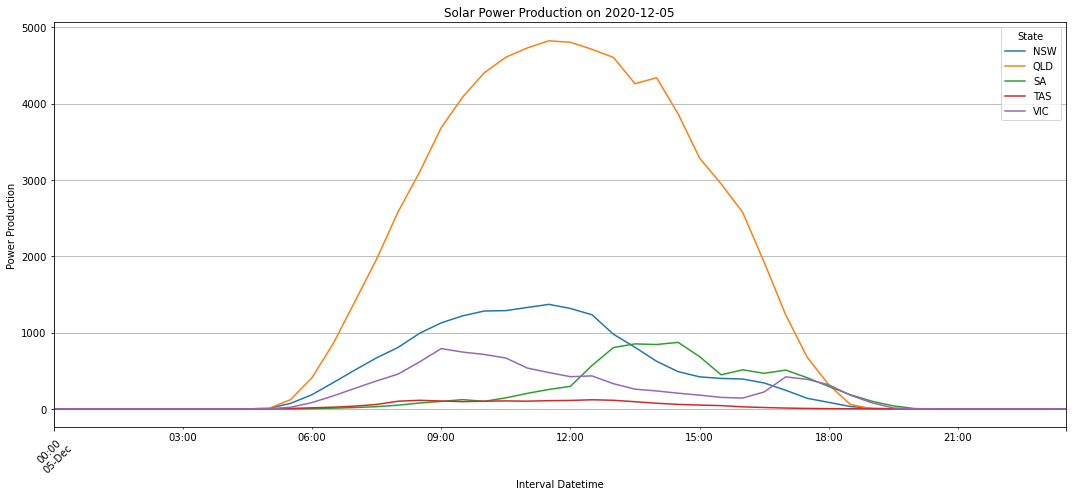

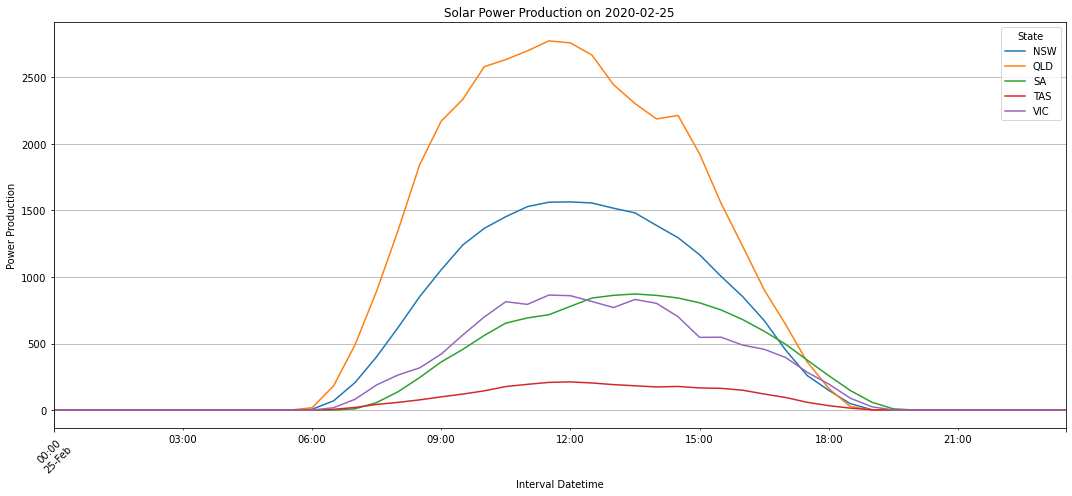

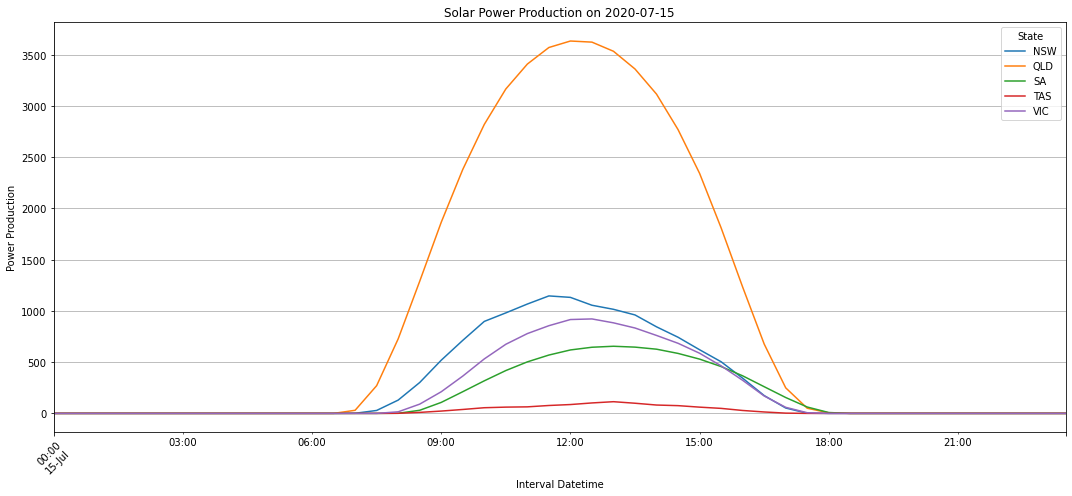

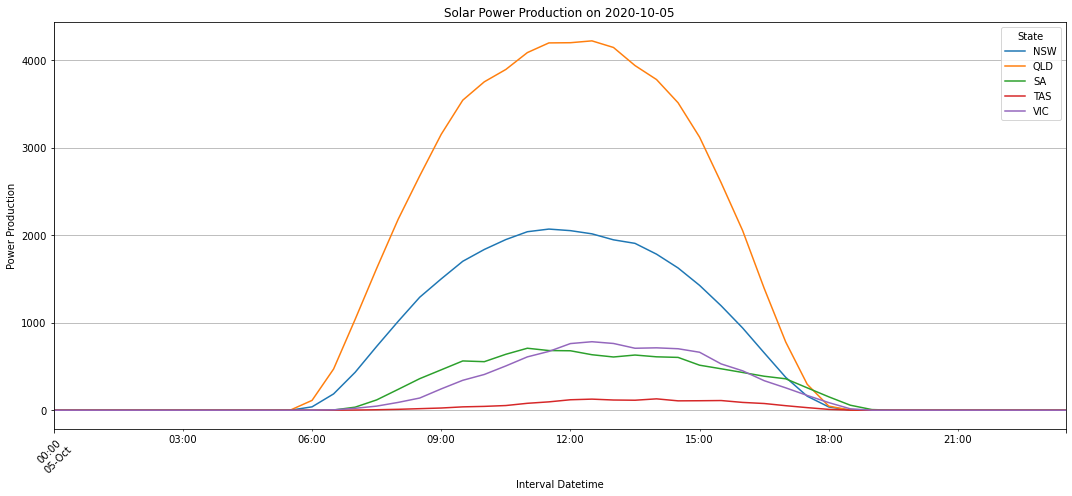

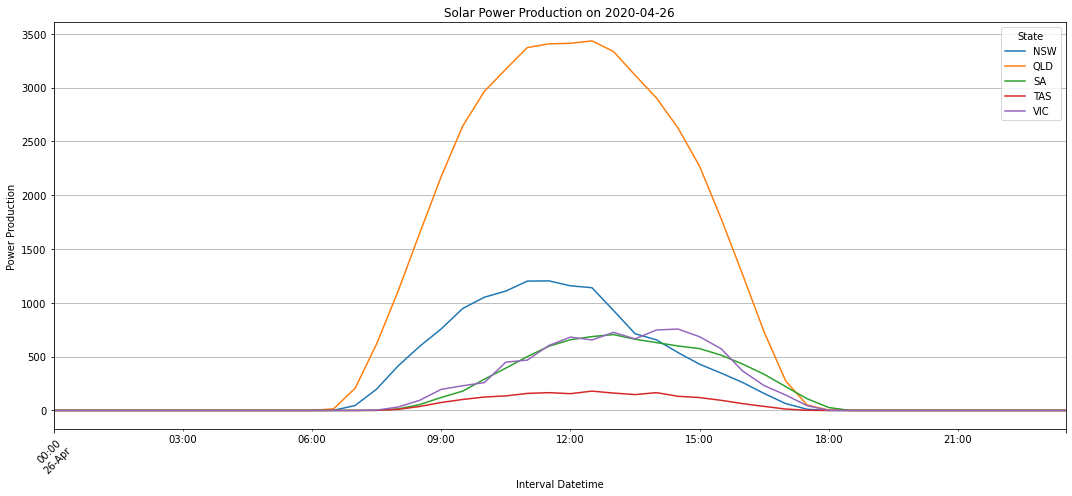

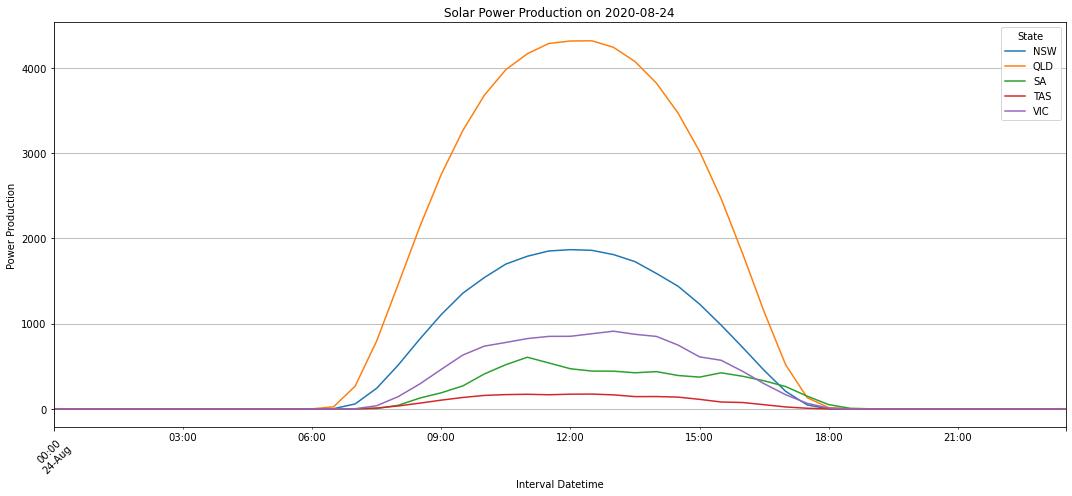

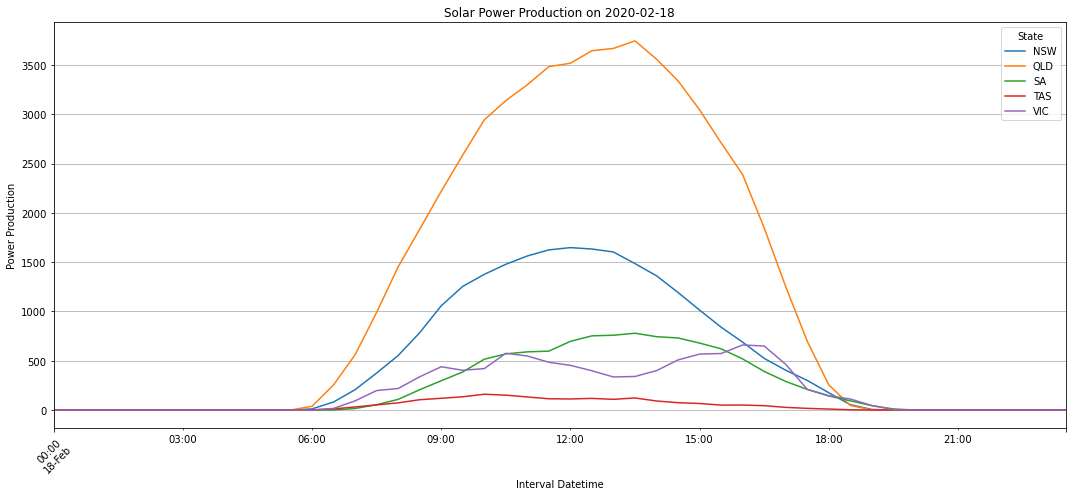

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_2020 = combined_df_grouped_sorted[pd.to_datetime(combined_df_grouped_sorted['INTERVAL_DATETIME']).dt.year == 2020]

unique_days = df_2020['INTERVAL_DATETIME'].dt.date.unique()

selected_days = np.random.choice(unique_days, 10, replace=False)


for day in selected_days:
    
    df_day = df_2020[df_2020['INTERVAL_DATETIME'].dt.date == day]
    
    
    df_day_pivot = df_day.pivot(index='INTERVAL_DATETIME', columns='State', values='POWER')
    
    
    df_day_pivot.plot(kind='line', figsize=(15, 7))
    plt.title(f"Solar Power Production on {day}")
    plt.xlabel('Interval Datetime')
    plt.ylabel('Power Production')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()
